This Jupyter Notebook will be focus on EDA and previsualization. 


Here we will have small anotations for futher Data analisys, insights and conclusions.

# Set up
## Import libraries and dataset ajusts

In [18]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt



We are going to use Cchurn as main dataset, however Cstatus has Churn reason, and Cdemographics has Churn Customer age

In [19]:
Cchurn = pd.read_csv(r"/Users/manuelmelendez/Desktop/FULL PROJECTS/Telecommunications_Industry/TELCO/CustomerChurn.csv")
Cstatus = pd.read_csv(r"/Users/manuelmelendez/Desktop/FULL PROJECTS/Telecommunications_Industry/TELCO/Telco_customer_churn_status.csv")
Cdemographics = pd.read_csv(r"/Users/manuelmelendez/Desktop/FULL PROJECTS/Telecommunications_Industry/TELCO/Cdemographics.csv")


In [20]:
Cchurn = Cchurn.merge(Cstatus[['Customer ID','Churn Category']], on = 'Customer ID', how = 'left')
Cchurn = Cchurn.merge(Cstatus[['Customer ID','Churn Reason']], on = 'Customer ID', how = 'left')

Cchurn = Cchurn.merge(Cdemographics[['Customer ID','Age']], on = 'Customer ID', how = 'left')

1. For better maneability we merge Cchurn with the desired columns from each dataset ( this process is similar to SQL Inner Join)

In [21]:
#We will use for further analysis 
# Count values and convert to DataFrame
churn_reason_counts = Cchurn['Churn Reason'].value_counts().reset_index()

# Rename columns for better clarity
churn_reason_counts.columns = ['Churn Reason', 'Count']

# Style the DataFrame with white background, black text, and black gridlines
styled_table = churn_reason_counts.style.set_properties(
    **{
        'background-color': 'white',
        'border': '1px solid black',
        'color': 'black'  # Set the text color to black
    }
)
# Display the styled DataFrame
styled_table


,Churn Reason,Count
0,Competitor had better devices,313
1,Competitor made better offer,311
2,Attitude of support person,220
3,Don't know,130
4,Competitor offered more data,117
5,Competitor offered higher download speeds,100
6,Attitude of service provider,94
7,Price too high,78
8,Product dissatisfaction,77
9,Network reliability,72


## Data Structure

In [22]:
Cchurn.head()

,Unnamed: 0,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Churn Category,Churn Reason,Age
0,0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN,36
1,1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,...,No,One year,No,Mailed check,56.95,1889.5,No,NaN,NaN,46
2,2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor,Competitor made better offer,37
3,3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN,53
4,4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Other,Moved,19


In [23]:
Cchurn.shape

(7043, 25)

In [24]:
Cchurn.columns

Index(['Unnamed: 0', 'LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn', 'Churn Category', 'Churn Reason', 'Age'],
      dtype='object')

In [25]:
Cchurn.columns = Cchurn.columns.str.replace(' ','_')
Cchurn.columns = Cchurn.columns.str.lower()
Cchurn.columns

Index(['unnamed:_0', 'loyaltyid', 'customer_id', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'churn', 'churn_category', 'churn_reason', 'age'],
      dtype='object')

In [26]:
Cchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         7043 non-null   int64  
 1   loyaltyid          7043 non-null   int64  
 2   customer_id        7043 non-null   object 
 3   senior_citizen     7043 non-null   object 
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

<Axes: >

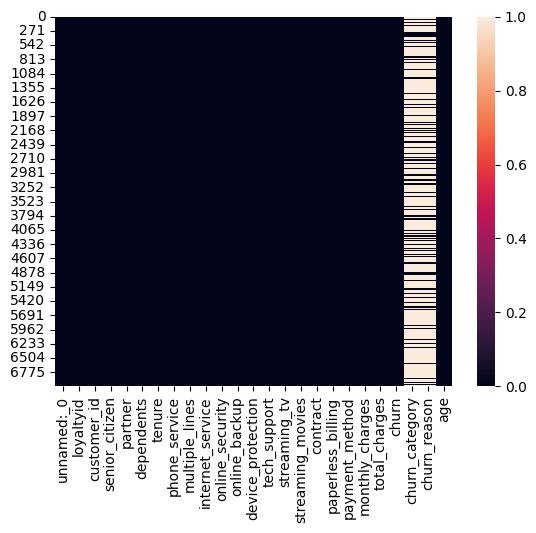

In [27]:
sns.heatmap(Cchurn.isnull())

In [28]:
Cchurn['churn_category'] = Cchurn['churn_category'].fillna('No churn')
#we replace the blank spaces in churn category for "no churn"


In [29]:
# We dont need a unnamed, loyaltyid, customer_id, total_Charges, and churn_reason anymore for this project
Cchurn = Cchurn.drop(columns=['unnamed:_0', 'loyaltyid', 'customer_id','total_charges','churn_reason'])

In [30]:
Cchurn.describe()

,tenure,monthly_charges,age
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,46.509726
std,24.559481,30.090047,16.750352
min,0.000000,18.250000,19.000000
25%,9.000000,35.500000,32.000000
50%,29.000000,70.350000,46.000000
75%,55.000000,89.850000,60.000000
max,72.000000,118.750000,80.000000


## Label encoding transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

CCC = Cchurn.copy(deep = True) #Customer Churn Copy
text_data_features = [i for i in list(Cchurn.columns) if i not in list(Cchurn.describe().columns)] 
#We create a list 
print(text_data_features)

In [223]:
print('Label Encoder Transformation')
for i in text_data_features :
    CCC[i] = LE.fit_transform(CCC[i])
    print(i,' : ',CCC[i].unique(),' = ',LE.inverse_transform(CCC[i].unique()))

Label Encoder Transformation
senior_citizen  :  [0 1]  =  ['No' 'Yes']
partner  :  [1 0]  =  ['Yes' 'No']
dependents  :  [0 1]  =  ['No' 'Yes']
phone_service  :  [0 1]  =  ['No' 'Yes']
multiple_lines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
internet_service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
online_security  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
online_backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
device_protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
tech_support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
streaming_tv  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
streaming_movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
paperless_billing  :  [1 0]  =  ['Yes' 'No']
payment_method  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn  :  [0 1]  =  ['No' 'Yes']
churn_category  :  [3 1 4 5

In [224]:
CCC.describe()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn,churn_category,age
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370,2.672725,46.509726
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561,0.981411,16.750352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,19.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000,3.000000,32.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000,3.000000,46.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000,3.000000,60.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000,5.000000,80.000000


## EDA

In [225]:
columns = list(CCC.columns)

# Definir columnas numéricas
numerical_data = CCC[['tenure', 'monthly_charges', 'age']]

# Seleccionar las columnas que no están en numerical_data
categorical_data = CCC[[col for col in CCC.columns if col not in numerical_data.columns]]

# Ahora numerical_data contiene los datos numéricos y categorical_data contiene el resto
print('Numerical Data:', *numerical_data.columns)
print('Categorical Data:', *categorical_data.columns)

Numerical Data: tenure monthly_charges age
Categorical Data: senior_citizen partner dependents phone_service multiple_lines internet_service online_security online_backup device_protection tech_support streaming_tv streaming_movies contract paperless_billing payment_method churn churn_category


Here because the number of numerical data is small, we can directly insert them into a list

## Churn Visualization

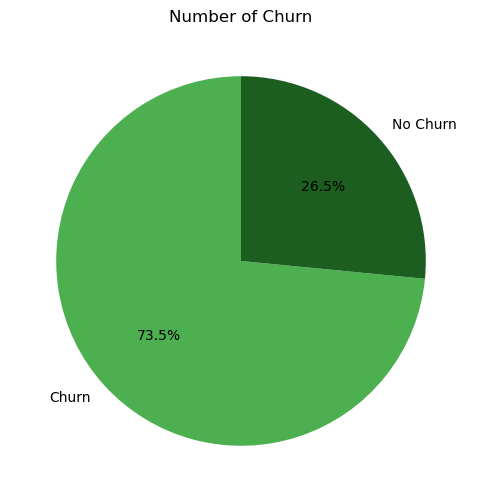

In [226]:
import matplotlib.pyplot as plt

# Data for pie chart
DF_counts = CCC['churn'].value_counts().tolist()  # List of values

# Create pie chart
plt.figure(figsize=(6,6))  # Set figure size
plt.pie(DF_counts, labels=['Churn', 'No Churn'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#1B5E20'])
plt.title('Number of Churn')
plt.show()

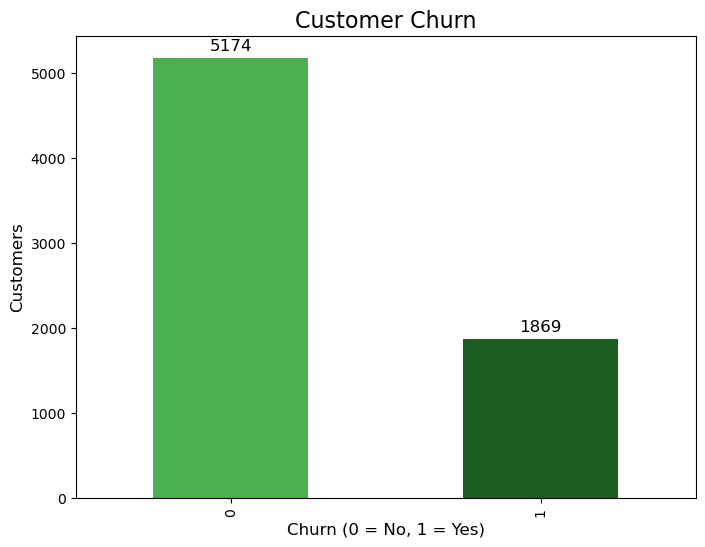

In [227]:
# Calculate value counts
DF_counts = CCC['churn'].value_counts()

# Create bar chart
plt.figure(figsize=(8,6))
ax = DF_counts.plot(kind='bar', color=['#4CAF50', '#1B5E20'])

plt.title('Customer Churn', fontsize=16)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Customers', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

1. We have an unbalanced dataset
2. Almost 75% no churn 25% churn. Analysis and visualization will show bias

## Categorical data vs Churn

In [228]:
categorical_data.columns

Index(['senior_citizen', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn', 'churn_category'],
      dtype='object')

In [229]:
## Divided data for better analisis 

L1 = ['senior_citizen', 'partner', 'dependents'] #Demographic variables
L2 = ['phone_service', 'multiple_lines', 'internet_service']#Fundamental services
L3 = ['contract', 'paperless_billing', 'payment_method']# customer preferences
L4 = ['online_security', 'online_backup', 'device_protection', 'tech_support'] # extra services
L5 = [ 'streaming_tv', 'streaming_movies']# type of stream
L6 = ['churn_category'] 

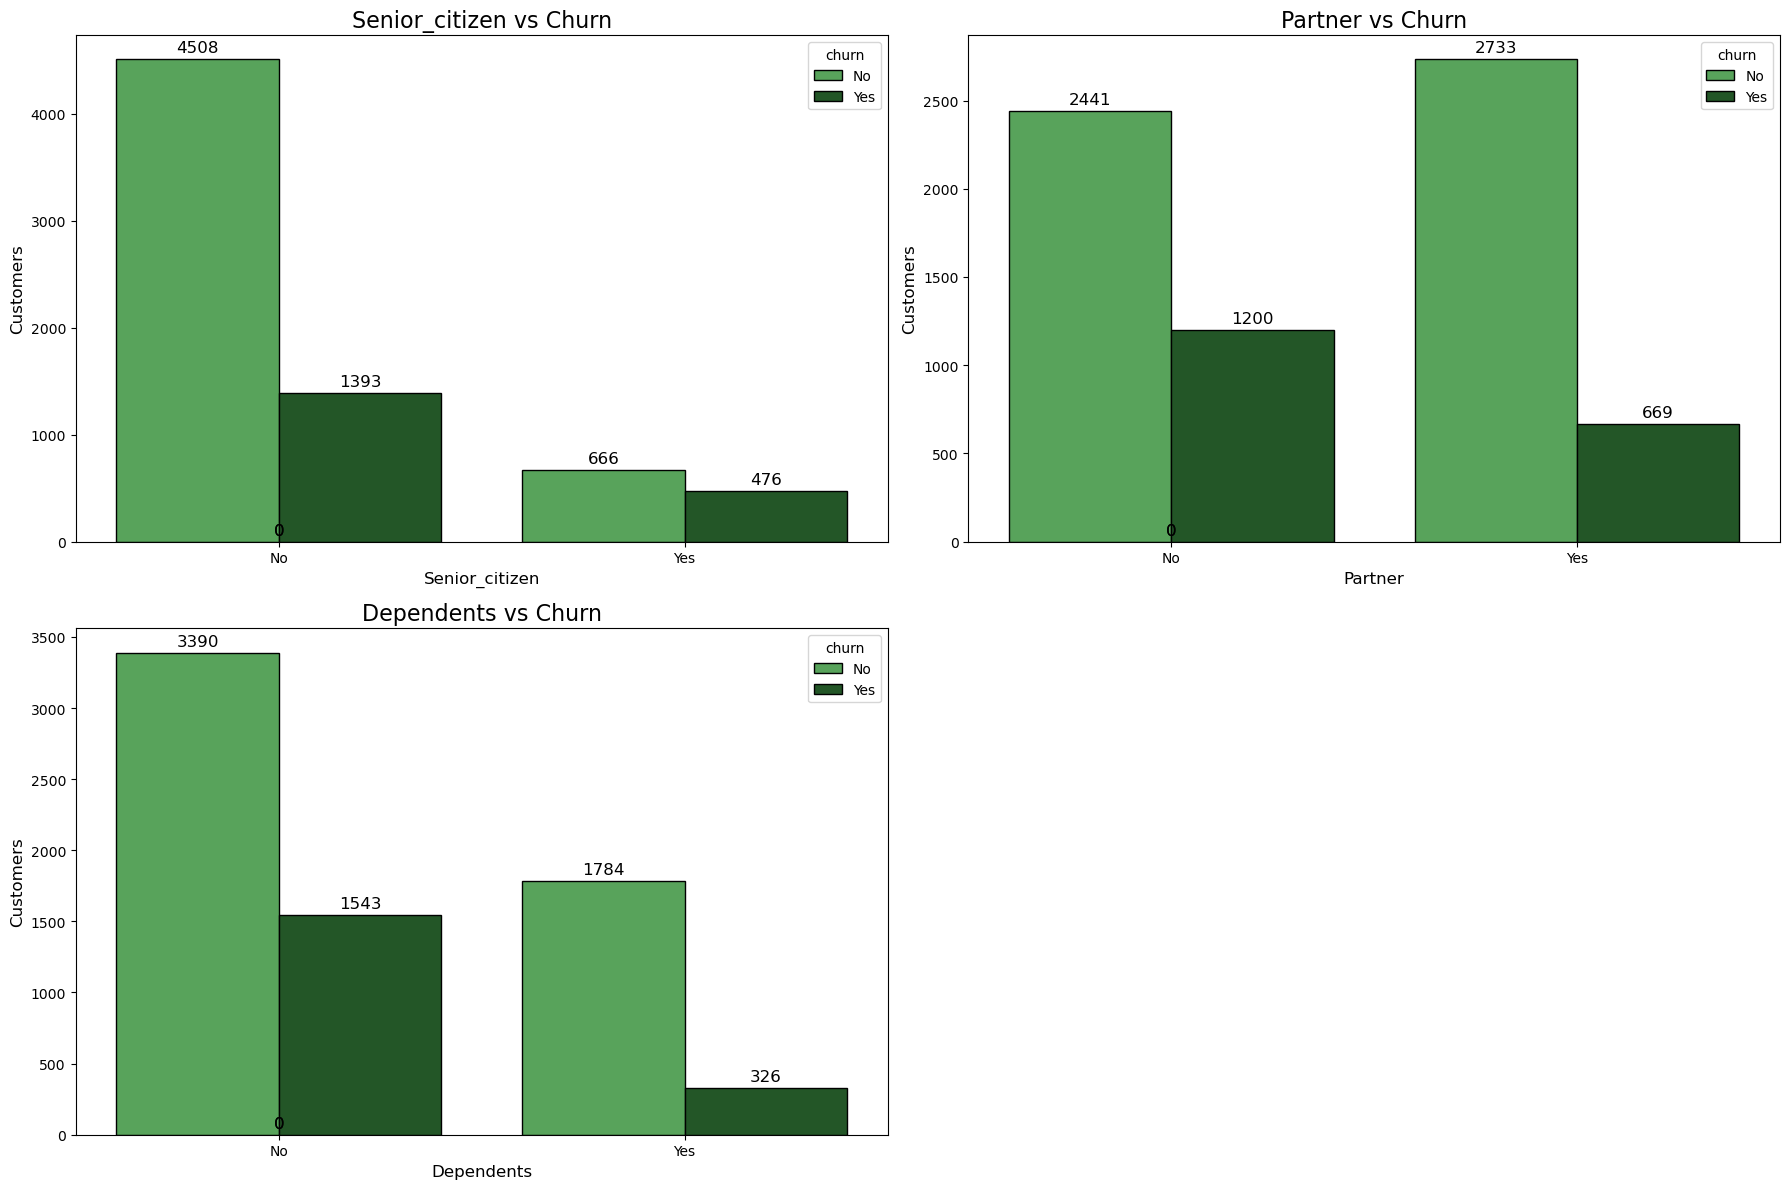

In [230]:
plt.figure(figsize=(18, 12))

# Iterate over the list L1 and create a bar plot for each column
for i, columns in enumerate(L1):
    plt.subplot(2, 2, i + 1)  # Create subplots
    
    # Create a bar plot for each column in L1 with respect to churn
    ax = sns.countplot(x=columns, data=CCC, hue=CCC['churn'].replace({0: 'No', 1: 'Yes'}), 
                       palette=['#4CAF50', '#1B5E20'], edgecolor='black')
    
    # Change the x-axis labels if they contain 0 and 1
    if CCC[columns].nunique() == 2:  # Check if the column has only two unique values (0 and 1)
        ax.set_xticks([0, 1])  # Set the positions of the ticks
        ax.set_xticklabels(['No', 'Yes'])  # Replace 0 and 1 with No and Yes
    
    # Add title and labels
    plt.title(f'{columns.capitalize()} vs Churn', fontsize=16)
    plt.xlabel(columns.capitalize(), fontsize=12)
    plt.ylabel('Customers', fontsize=12)
    
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

1.  Concerning the senior_citizen distribution (around 80 is not citizen)
    1.1 churn rate of senior citizen

2.  seems that having a partner or not affects churn rate

3.  seems that having dependants or not affects churn rate

## Fundamental services

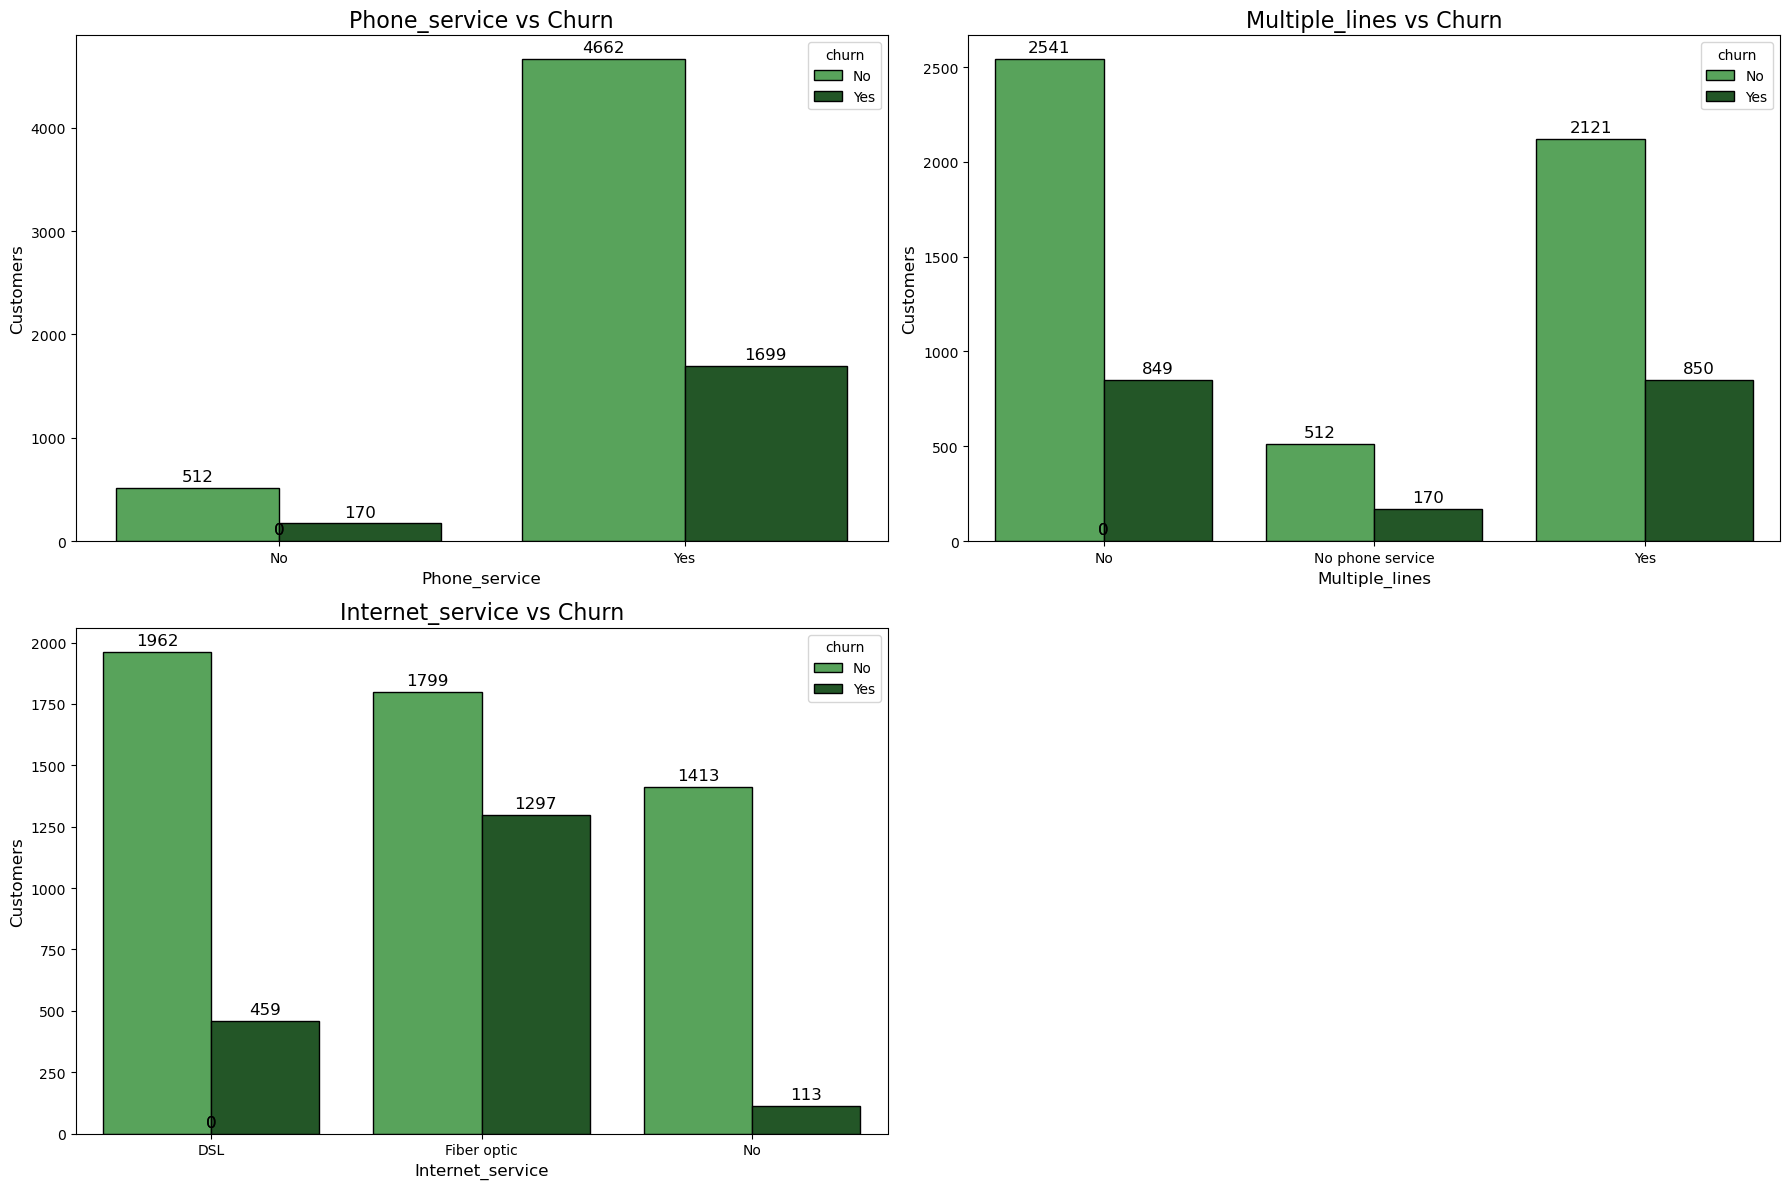

In [231]:
# Define the label mappings for specific columns
label_mappings = {
    'phone_service': {0: 'No', 1: 'Yes'},
    'multiple_lines': {0: 'No', 1: 'No phone service', 2: 'Yes'},
    'internet_service': {0: 'DSL', 1: 'Fiber optic', 2: 'No'}
}

plt.figure(figsize=(18, 12))

# Iterate over the list L2 and create a bar plot for each column
for i, columns in enumerate(L2):
    plt.subplot(2, 2, i + 1)  # Create subplots
    
    # Create a bar plot for each column in L2 with respect to churn
    ax = sns.countplot(x=columns, data=CCC, hue=CCC['churn'].replace({0: 'No', 1: 'Yes'}), 
                       palette=['#4CAF50', '#1B5E20'], edgecolor='black')
    
    # Set custom labels if the column has a mapping defined
    if columns in label_mappings:
        ax.set_xticks(list(label_mappings[columns].keys()))  # Set tick positions based on the dictionary keys
        ax.set_xticklabels(list(label_mappings[columns].values()))  # Set tick labels based on the dictionary values
    
    # Add title and labels
    plt.title(f'{columns.capitalize()} vs Churn', fontsize=16)
    plt.xlabel(columns.capitalize(), fontsize=12)
    plt.ylabel('Customers', fontsize=12)
    
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


1. Phone_service
<div style="background-color:#1B5E20; color:white; padding:10px;"> Phone_service or not, could be not relevant on churn </div>

2. multiple_lines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes'] doesnt seems relevant
<div style="background-color:#1B5E20; color:white; padding:10px;"> could be not relevant on churn </div>


3. internet_service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No'] - 
<div style="background-color:#1B5E20; color:white; padding:10px;"> DSL looks solid against churn on the other hand Fiber Optic.. </div>

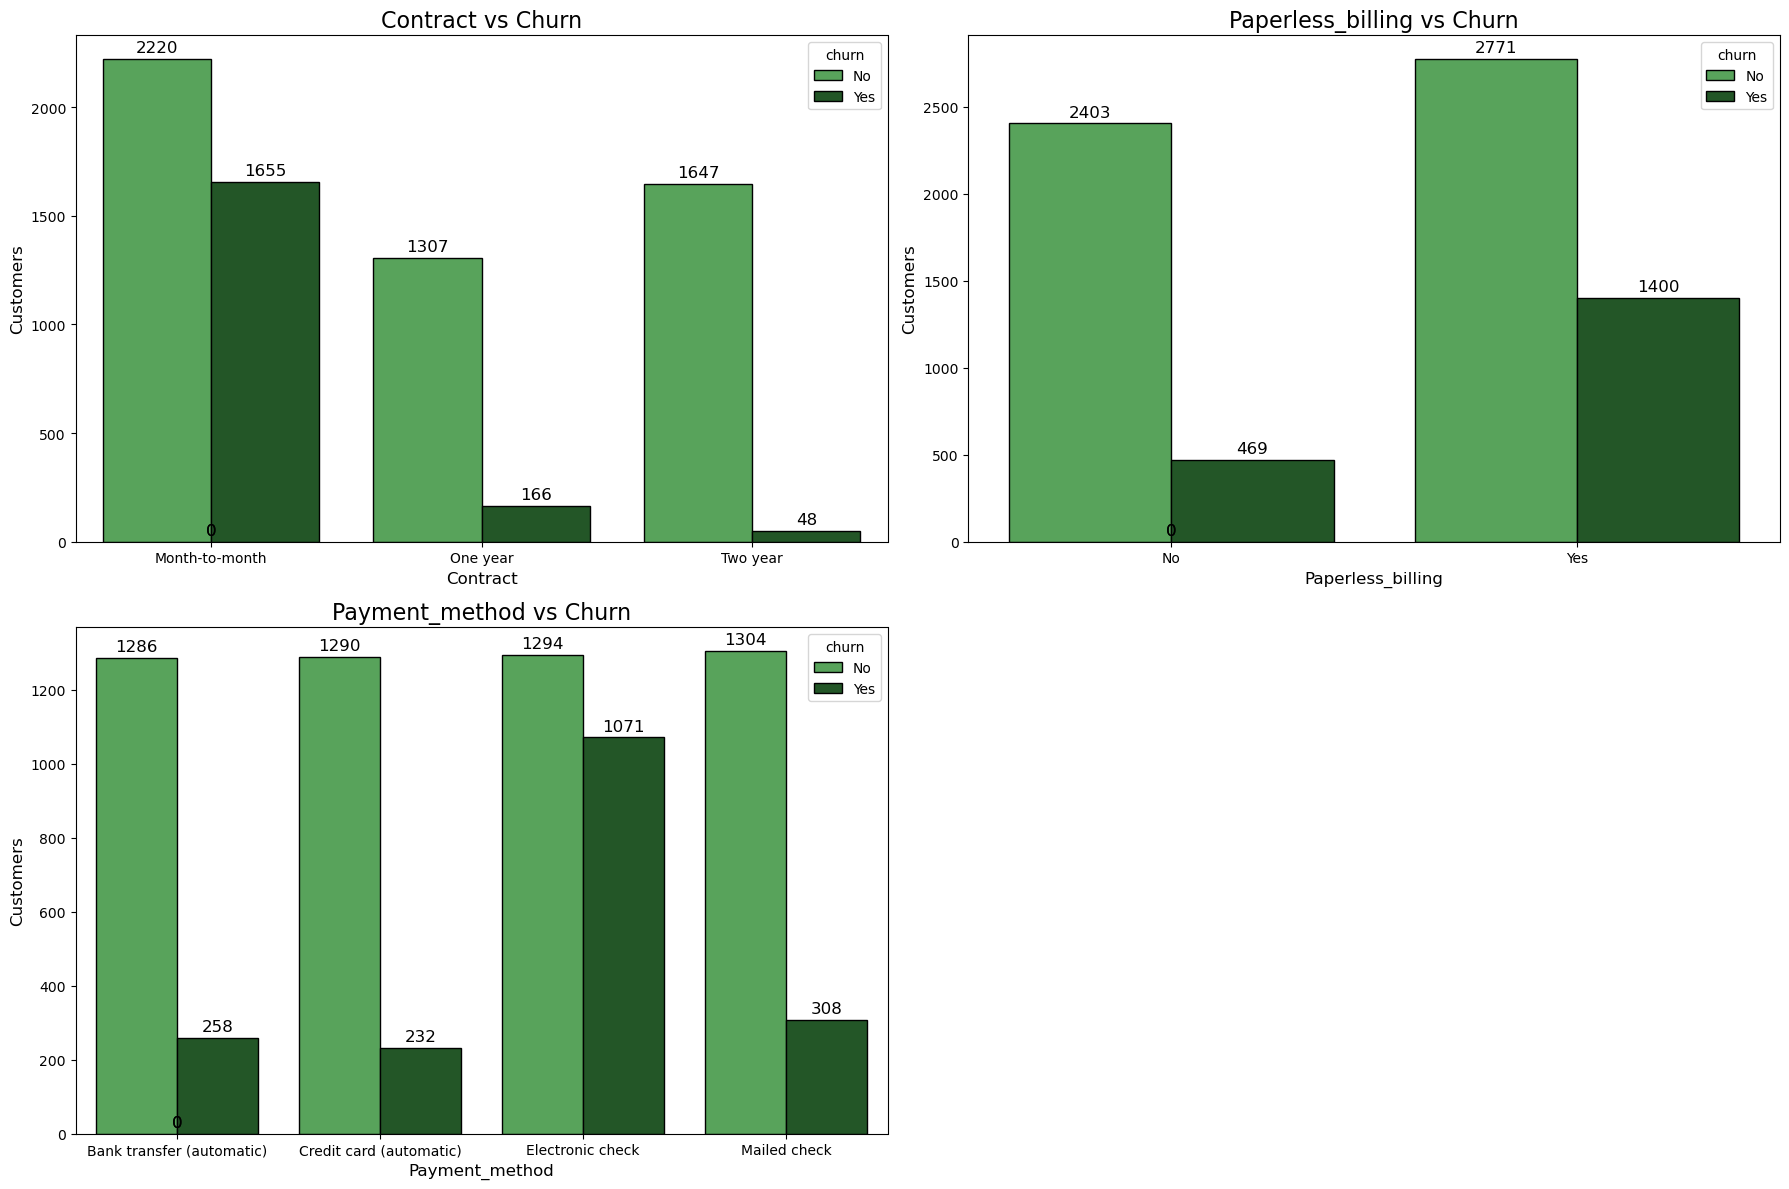

In [232]:
# Define the label mappings for specific columns
label_mappings = {
    'contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
    'paperless_billing': {1: 'Yes', 0: 'No'},
    'payment_method': {2: 'Electronic check', 3: 'Mailed check', 0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)'}
}

plt.figure(figsize=(18, 12))

# Iterate over the list L2 and create a bar plot for each column
for i, columns in enumerate(L3):
    plt.subplot(2, 2, i + 1)  # Create subplots
    
    # Create a bar plot for each column in L2 with respect to churn
    ax = sns.countplot(x=columns, data=CCC, hue=CCC['churn'].replace({0: 'No', 1: 'Yes'}), 
                       palette=['#4CAF50', '#1B5E20'], edgecolor='black')
    
    # Set custom labels if the column has a mapping defined
    if columns in label_mappings:
        ax.set_xticks(list(label_mappings[columns].keys()))  # Set tick positions based on the dictionary keys
        ax.set_xticklabels(list(label_mappings[columns].values()))  # Set tick labels based on the dictionary values
    
    # Add title and labels
    plt.title(f'{columns.capitalize()} vs Churn', fontsize=16)
    plt.xlabel(columns.capitalize(), fontsize=12)
    plt.ylabel('Customers', fontsize=12)
    
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


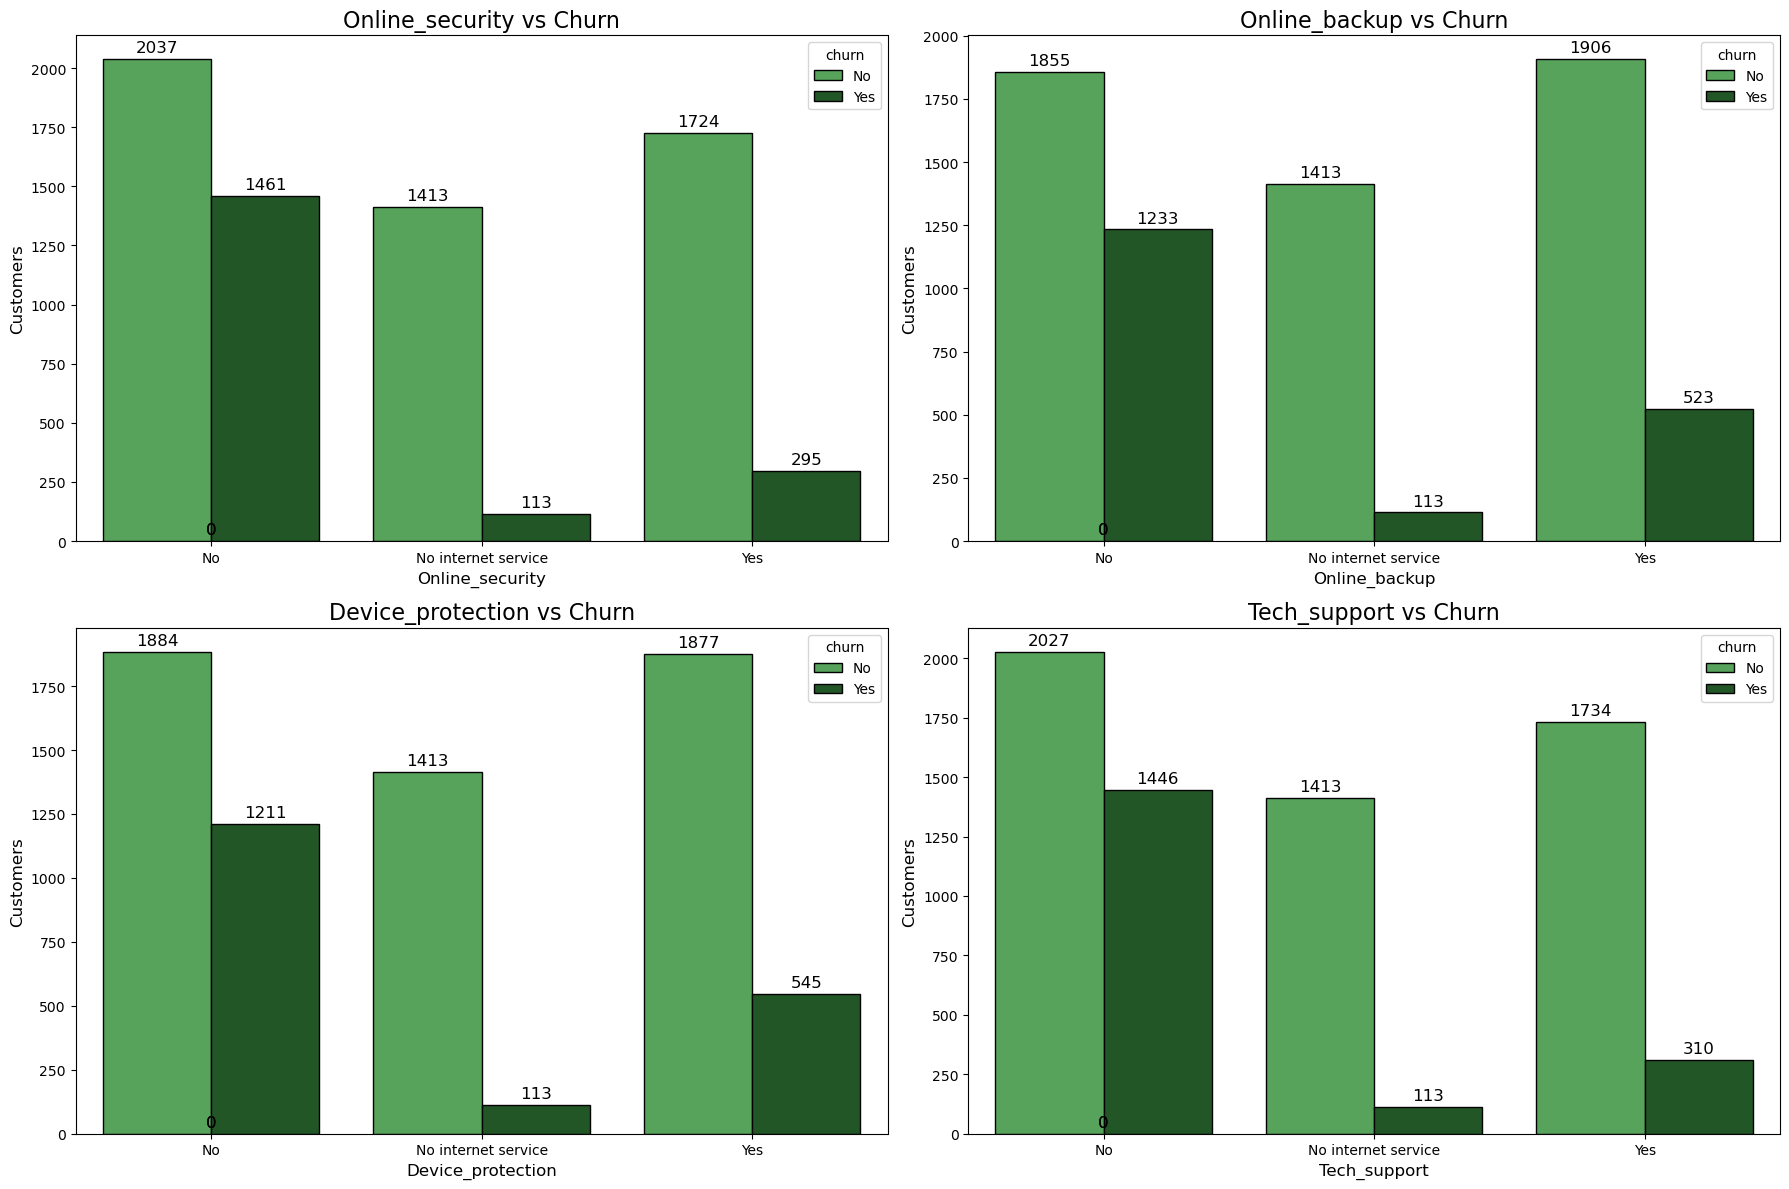

In [233]:
# Define the label mappings for specific columns
label_mappings = {
    'online_security': {0: 'No', 2: 'Yes', 1: 'No internet service'},
    'online_backup': {2: 'Yes', 0: 'No', 1: 'No internet service'},
    'device_protection': {0: 'No', 2: 'Yes', 1: 'No internet service'},
    'tech_support': {0: 'No', 2: 'Yes', 1: 'No internet service'}
}

plt.figure(figsize=(18, 12))

# Iterate over the list L3 and create a bar plot for each column
for i, columns in enumerate(L4):
    plt.subplot(2, 2, i + 1)  # Create subplots
    
    # Create a bar plot for each column in L3 with respect to churn
    ax = sns.countplot(x=columns, data=CCC, hue=CCC['churn'].replace({0: 'No', 1: 'Yes'}), 
                       palette=['#4CAF50', '#1B5E20'], edgecolor='black')
    
    # Set custom labels if the column has a mapping defined
    if columns in label_mappings:
        ax.set_xticks(list(label_mappings[columns].keys()))  # Set tick positions based on the dictionary keys
        ax.set_xticklabels(list(label_mappings[columns].values()))  # Set tick labels based on the dictionary values
    
    # Add title and labels
    plt.title(f'{columns.capitalize()} vs Churn', fontsize=16)
    plt.xlabel(columns.capitalize(), fontsize=12)
    plt.ylabel('Customers', fontsize=12)
    
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


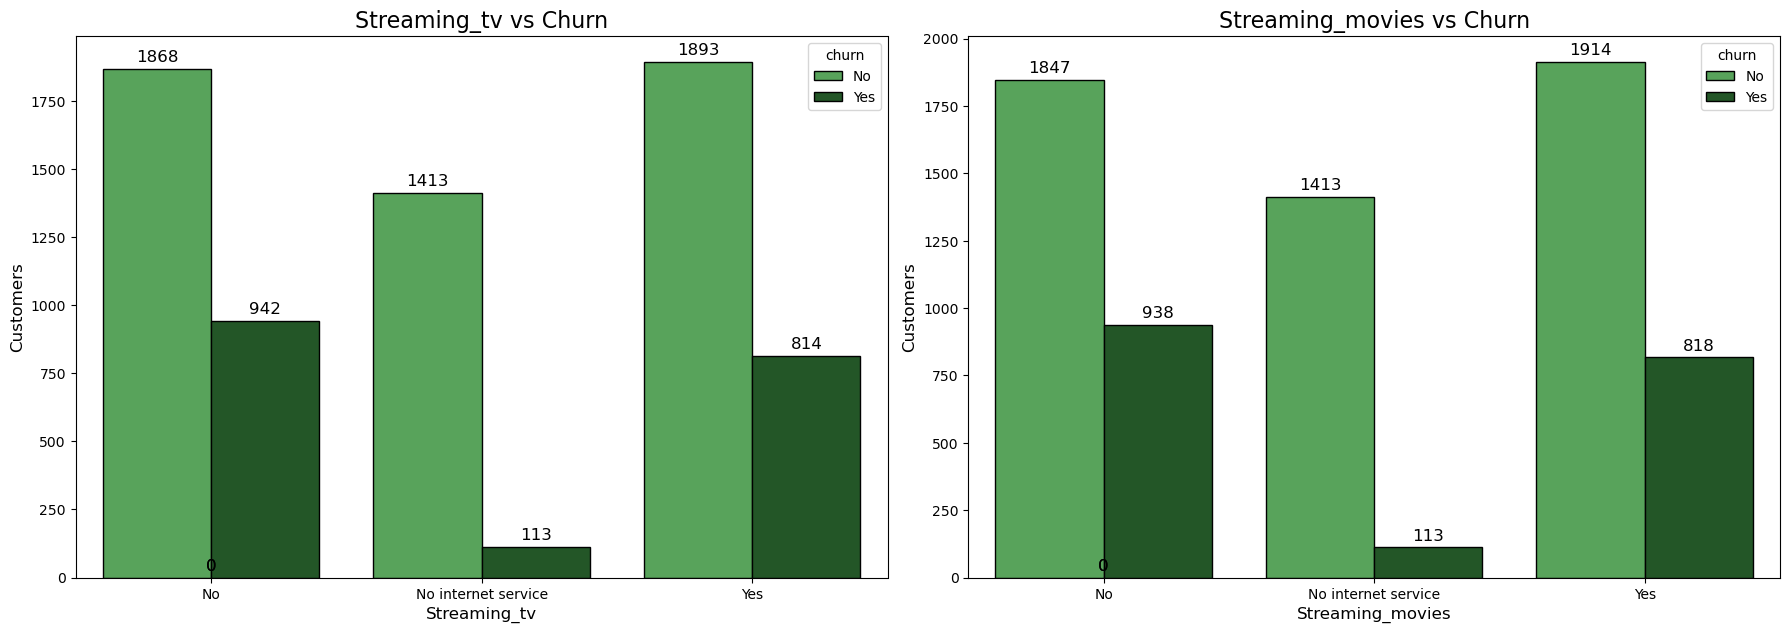

In [234]:
# Define the label mappings for specific columns
label_mappings = {
    'streaming_tv': {0: 'No', 2: 'Yes', 1: 'No internet service'},
    'streaming_movies': {0: 'No', 2: 'Yes', 1: 'No internet service'}
}

plt.figure(figsize=(18, 12))

# Iterate over the list L3 and create a bar plot for each column
for i, columns in enumerate(L5):
    plt.subplot(2, 2, i + 1)  # Create subplots
    
    # Create a bar plot for each column in L3 with respect to churn
    ax = sns.countplot(x=columns, data=CCC, hue=CCC['churn'].replace({0: 'No', 1: 'Yes'}), 
                       palette=['#4CAF50', '#1B5E20'], edgecolor='black')
    
    # Set custom labels if the column has a mapping defined
    if columns in label_mappings:
        ax.set_xticks(list(label_mappings[columns].keys()))  # Set tick positions based on the dictionary keys
        ax.set_xticklabels(list(label_mappings[columns].values()))  # Set tick labels based on the dictionary values
    
    # Add title and labels
    plt.title(f'{columns.capitalize()} vs Churn', fontsize=16)
    plt.xlabel(columns.capitalize(), fontsize=12)
    plt.ylabel('Customers', fontsize=12)
    
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


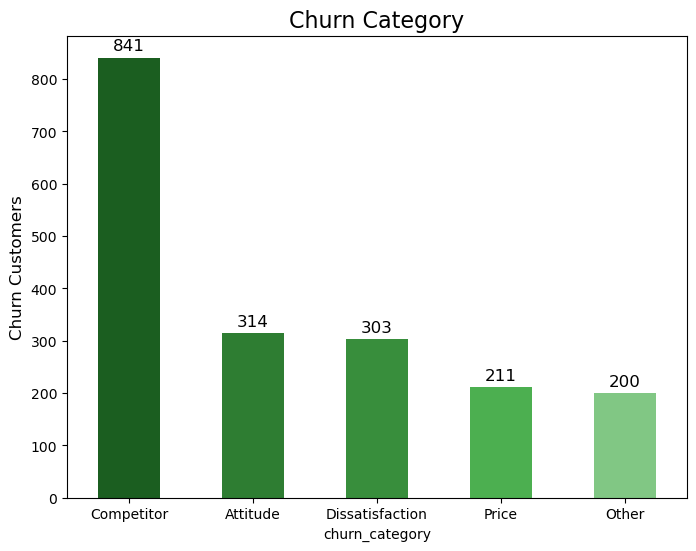

In [235]:
# Excluding no churn, we be part of our analisis for this colums
DF_counts = CCC[CCC['churn_category'] != 3]['churn_category'].value_counts()

# Crear un gráfico de barras con diferentes tonos de verde
plt.figure(figsize=(8,6))

# Lista de colores en diferentes tonos de verde
colors = ['#1B5E20','#2E7D32','#388E3C','#4CAF50','#81C784']

# Crear gráfico de barras
ax = DF_counts.plot(kind='bar', color=colors)

# Título y etiquetas
plt.title('Churn Category', fontsize=16)
# plt.xlabel('Churn Categories', fontsize=12)
plt.ylabel('Churn Customers', fontsize=12)

# Asignar nuevas etiquetas en el eje x
ax.set_xticklabels([ 'Competitor', 'Attitude','Dissatisfaction', 'Price', 'Other'], rotation=0)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Numerical data vs Churn
tenure, monthly_charges, age

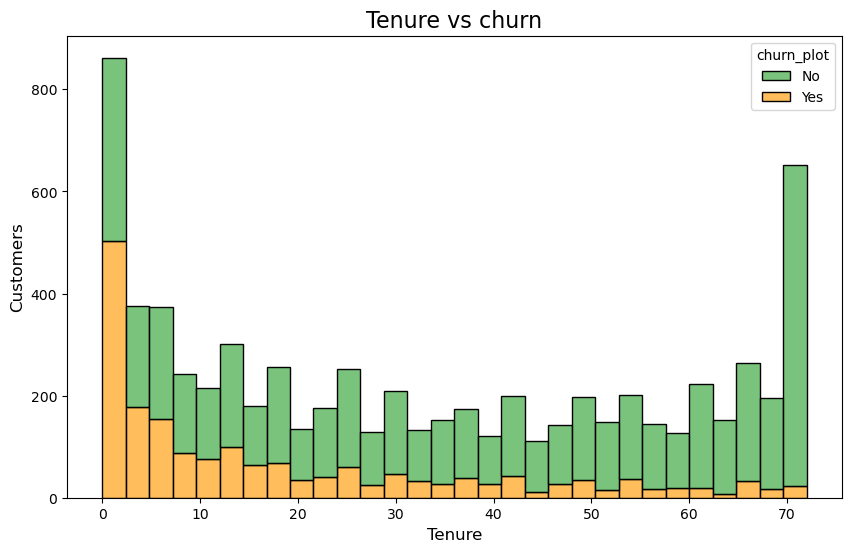

In [236]:
# Reemplazar temporalmente 0 y 1 por 'No' y 'Yes' en la columna 'churn'
CCC['churn_plot'] = CCC['churn'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))

# Crear un histograma con los valores modificados
sns.histplot(data=CCC, x='tenure', hue='churn_plot', multiple='stack', bins=30, 
             palette=['#4CAF50', '#FFA726'], kde=False, edgecolor='black')

# Añadir título y etiquetas
plt.title('Tenure vs churn', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Customers', fontsize=12)

# Mostrar la gráfica
plt.show()

# Eliminar la columna temporal después de usarla
CCC.drop('churn_plot', axis=1, inplace=True)


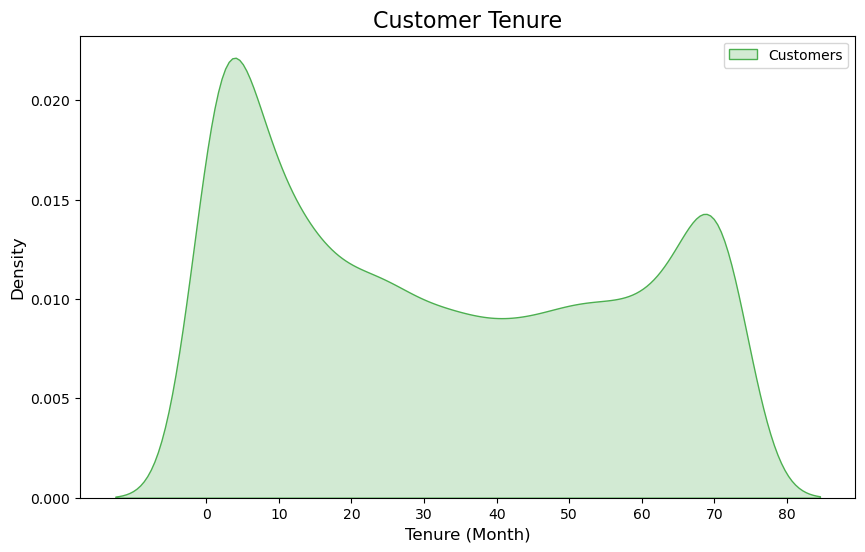

In [237]:
plt.figure(figsize=(10, 6))

# Crear gráfico de densidad para todos los clientes
sns.kdeplot(CCC['tenure'], fill=True, color='#4CAF50', label='Customers')
plt.title('Customer Tenure', fontsize=16)
plt.xlabel('Tenure (Month)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Configurar el eje X con incrementos de 10
plt.xticks(ticks=range(0, 81, 10))

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

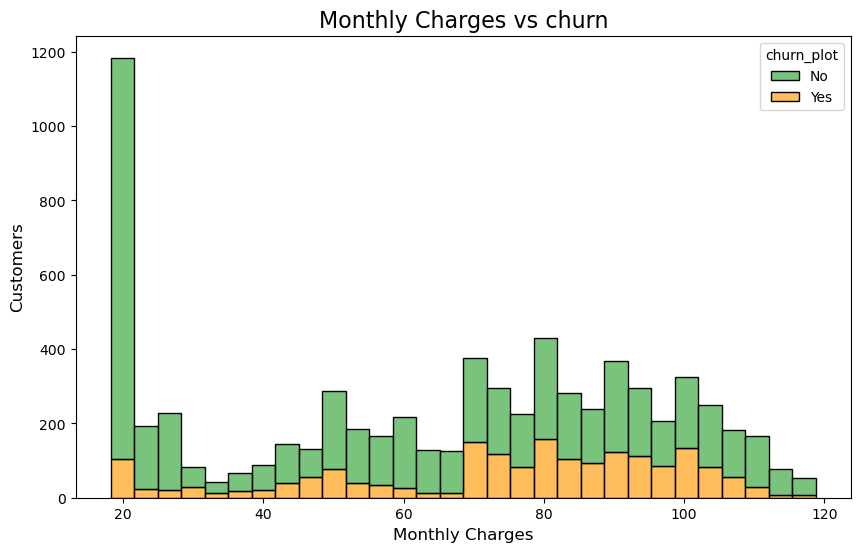

In [238]:
# Reemplazar temporalmente 0 y 1 por 'No' y 'Yes' en la columna 'churn'
CCC['churn_plot'] = CCC['churn'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))

# Crear un histograma con los valores modificados
sns.histplot(data=CCC, x='monthly_charges', hue='churn_plot', multiple='stack', bins=30, 
             palette=['#4CAF50', '#FFA726'], kde=False, edgecolor='black')

# Añadir título y etiquetas
plt.title('Monthly Charges vs churn', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Customers', fontsize=12)

# Mostrar la gráfica
plt.show()

# Eliminar la columna temporal después de usarla
CCC.drop('churn_plot', axis=1, inplace=True)


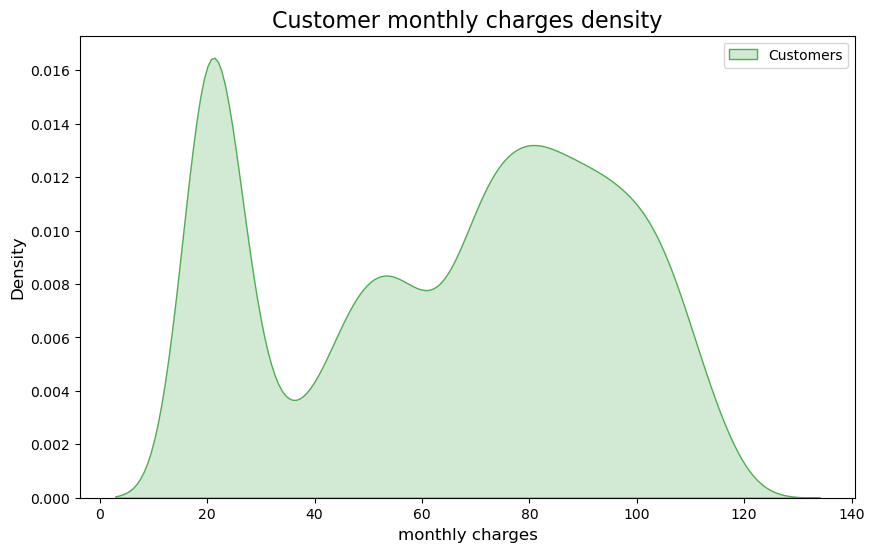

In [239]:
plt.figure(figsize=(10, 6))

# Crear gráfico de densidad para todos los clientes
sns.kdeplot(CCC['monthly_charges'], fill=True, color='#4CAF50', label='Customers')


plt.title('Customer monthly charges density', fontsize=16)
plt.xlabel('monthly charges', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Configurar el eje X con incrementos de 10
# plt.xticks(ticks=range(0, 81, 10))

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

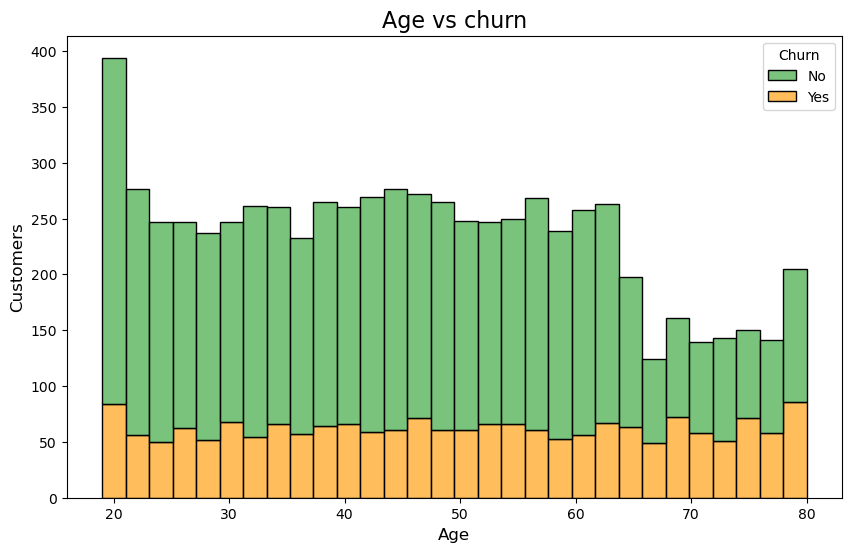

In [240]:
# Reemplazar temporalmente 0 y 1 por 'No' y 'Yes' en la columna 'churn'
CCC['Churn'] = CCC['churn'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))

# Crear un histograma con los valores modificados
sns.histplot(data=CCC, x='age', hue='Churn', multiple='stack', bins=30, 
             palette=['#4CAF50', '#FFA726'], kde=False, edgecolor='black')

# Añadir título y etiquetas
plt.title('Age vs churn', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Customers', fontsize=12)

# Mostrar la gráfica
plt.show()

# Eliminar la columna temporal después de usarla
CCC.drop('Churn', axis=1, inplace=True)

In [242]:
CCC.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'churn', 'churn_category', 'age'],
      dtype='object')

In [ ]:
# save the document Cchurn as csv file


Cchurn.to_csv('Cchurn.csv', index=False)